Elips projection 


In [2]:
import numpy as np

import matplotlib.pyplot as plt

num_of_pointes = 16


center = (0, 0)
width = 20
height = 40
angle = 0


basic calc

In [3]:
angle = (2*np.pi) / num_of_pointes
print(angle)

0.39269908169872414


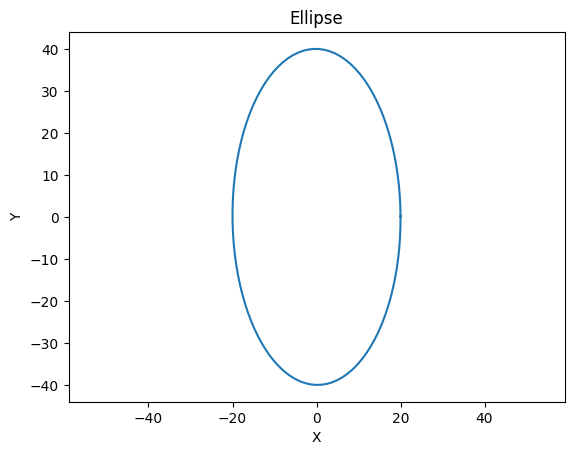

In [4]:
import numpy as np





import matplotlib.pyplot as plt

def plot_ellipse(center, width, height, angle):
    # Generate the ellipse points
    theta = np.linspace(0, 2*np.pi, 100)
    x = center[0] + width * np.cos(theta) * np.cos(np.deg2rad(angle)) - height * np.sin(theta) * np.sin(np.deg2rad(angle))
    y = center[1] + width * np.cos(theta) * np.sin(np.deg2rad(angle)) + height * np.sin(theta) * np.cos(np.deg2rad(angle))

    # Plot the ellipse
    plt.plot(x, y)
    plt.axis('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Ellipse')
   

# Call the procedure with the given variables
plot_ellipse(center, width, height, angle)

In [5]:
import numpy as np

def rotation_matrix(angle, axis):
    # Normalize the axis vector
    axis = axis / np.linalg.norm(axis)
    
    # Compute the sine and cosine of the angle
    c = np.cos(angle)
    s = np.sin(angle)
    
    # Compute the components of the rotation matrix
    x = axis[0]
    y = axis[1]
    z = axis[2]
    
    # Compute the rotation matrix
    rotation_matrix = np.array([[c + x**2*(1-c), x*y*(1-c) - z*s, x*z*(1-c) + y*s],
                                [y*x*(1-c) + z*s, c + y**2*(1-c), y*z*(1-c) - x*s],
                                [z*x*(1-c) - y*s, z*y*(1-c) + x*s, c + z**2*(1-c)]])
    
    return rotation_matrix






rot angle x: -1.0471975511965979
[[ 1.         0.         0.       ]
 [ 0.         0.5        0.8660254]
 [ 0.        -0.8660254  0.5      ]]
0.1715728752538099
0.9999999999999998
5.82842712474619
[[ 2.00000000e+01  0.00000000e+00  0.00000000e+00]
 [ 1.84775907e+01  1.53073373e+01  1.77635684e-15]
 [ 1.41421356e+01  2.82842712e+01  3.55271368e-15]
 [ 7.65366865e+00  3.69551813e+01  0.00000000e+00]
 [ 0.00000000e+00  4.00000000e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.00000000e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.0

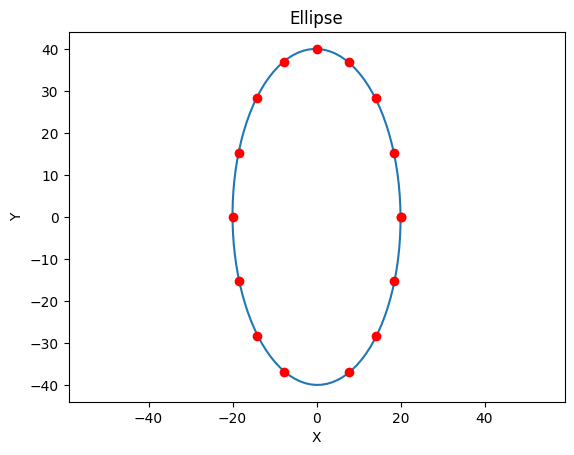

[[ 2.00000000e+01  0.00000000e+00  0.00000000e+00]
 [ 1.84775907e+01  1.53073373e+01  1.77635684e-15]
 [ 1.41421356e+01  2.82842712e+01  3.55271368e-15]
 [ 7.65366865e+00  3.69551813e+01  0.00000000e+00]
 [ 0.00000000e+00  4.00000000e+01  0.00000000e+00]
 [-1.84775907e+01  1.53073373e+01  4.86495385e-16]
 [-1.41421356e+01  2.82842712e+01 -1.82080157e-15]
 [-7.65366865e+00  3.69551813e+01  9.37304081e-16]
 [-2.00000000e+01 -2.44929360e-15  0.00000000e+00]
 [-1.84775907e+01 -1.53073373e+01  1.77635684e-15]
 [-1.41421356e+01 -2.82842712e+01  3.55271368e-15]
 [-7.65366865e+00 -3.69551813e+01  0.00000000e+00]
 [ 2.00000000e+01 -2.44929360e-15 -2.44929360e-15]
 [ 1.84775907e+01 -1.53073373e+01 -4.03920906e-15]
 [ 1.41421356e+01 -2.82842712e+01 -5.28462579e-15]
 [ 7.65366865e+00 -3.69551813e+01 -9.37304081e-16]]


In [6]:
vecter = np.zeros((num_of_pointes, 3))
width_squared = width ** 2

rot_angle_x = (-1)*np.arccos(width/height)
print("rot angle x: " + str(rot_angle_x))

rotx=rotation_matrix(rot_angle_x, np.array([1, 0, 0]))
print(rotx)

vecter[0] = (width, 0, 0)


for i in range(1,int(num_of_pointes/4)):
    print(np.tan(i*angle)**2)
    vecter[i] = (np.sqrt(width_squared/(1+(np.tan(i*angle)**2))), 
                 np.sqrt(width_squared/(1+(1/(np.tan(i*angle)**2)))),
                 np.tan(i*angle)*np.sqrt(width_squared/(1+(np.tan(i*angle)**2)))*np.tan(rot_angle_x))



for i in range(int(num_of_pointes/4)):
    vecter[i] = np.matrix(vecter[i]) * np.matrix(rotx)

vecter[4] = (0, height, 0)
vecter[12] = (0, -1*height, 0)

print(vecter)

rotz = rotation_matrix(np.pi, np.array([0, 0, 1]))

for i in range(int(num_of_pointes/4)):
    vecter[i+8] = np.matrix(vecter[i]) * np.matrix(rotz)


roty = rotation_matrix(np.pi, np.array([0, 1, 0]))

for i in range(1,4):
    vecter[i+4] = np.matrix(vecter[i]) * np.matrix(roty)

for i in range(8,12):
    vecter[i+4] = np.matrix(vecter[i]) * np.matrix(roty)

plot_ellipse(center, width, height, angle)

plt.plot(vecter[:,0], vecter[:,1], 'ro')
plt.show()

print(vecter)










rot angle x: -1.0471975511965979
5.82842712474619
0.9999999999999998
0.1715728752538099
[[ 0.00000000e+00  2.00000000e+01  3.46410162e+01]
 [ 7.65366865e+00  3.69551813e+01  0.00000000e+00]
 [ 1.41421356e+01  2.82842712e+01  3.55271368e-15]
 [ 1.84775907e+01  1.53073373e+01  1.77635684e-15]
 [ 0.00000000e+00  4.00000000e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.00000000e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


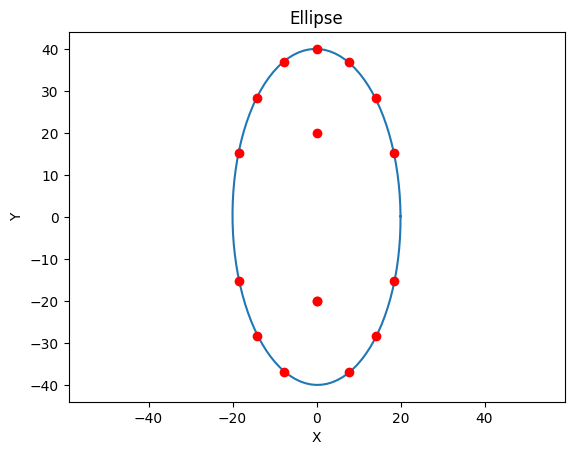

[[ 0.00000000e+00  2.00000000e+01  3.46410162e+01]
 [ 7.65366865e+00  3.69551813e+01  0.00000000e+00]
 [ 1.41421356e+01  2.82842712e+01  3.55271368e-15]
 [ 1.84775907e+01  1.53073373e+01  1.77635684e-15]
 [ 0.00000000e+00  4.00000000e+01  0.00000000e+00]
 [-7.65366865e+00  3.69551813e+01  9.37304081e-16]
 [-1.41421356e+01  2.82842712e+01 -1.82080157e-15]
 [-1.84775907e+01  1.53073373e+01  4.86495385e-16]
 [ 2.44929360e-15 -2.00000000e+01  3.46410162e+01]
 [-7.65366865e+00 -3.69551813e+01  0.00000000e+00]
 [-1.41421356e+01 -2.82842712e+01  3.55271368e-15]
 [-1.84775907e+01 -1.53073373e+01  1.77635684e-15]
 [-6.69159455e-15 -2.00000000e+01 -3.46410162e+01]
 [ 7.65366865e+00 -3.69551813e+01 -9.37304081e-16]
 [ 1.41421356e+01 -2.82842712e+01 -5.28462579e-15]
 [ 1.84775907e+01 -1.53073373e+01 -4.03920906e-15]]


In [7]:
vecter = np.zeros((num_of_pointes, 3))
width_squared = width ** 2

rot_angle_x = (-1)*np.arccos(width/height)
print("rot angle x: " + str(rot_angle_x))

rotx=rotation_matrix(rot_angle_x, np.array([1, 0, 0]))

vecter[0] = (0, height, 0)


for i in range(1,int(num_of_pointes/4)):
    print(np.tan(np.pi/2 -i*angle)**2)
    vecter[i] = (np.sqrt(width_squared/(1+(np.tan(np.pi/2 -i*angle)**2))), 
                 np.sqrt(width_squared/(1+(1/(np.tan(np.pi/2 -i*angle)**2)))),
                 np.tan(np.pi/2 -i*angle)*np.sqrt(width_squared/(1+(np.tan(np.pi/2 -i*angle)**2)))*np.tan(rot_angle_x))



for i in range(int(num_of_pointes/4)):
    vecter[i] = np.matrix(vecter[i]) * np.matrix(rotx)

vecter[4] = (0, height, 0)
vecter[12] = (0, -1*height, 0)

print(vecter)

rotz = rotation_matrix(np.pi, np.array([0, 0, 1]))

for i in range(int(num_of_pointes/4)):
    vecter[i+8] = np.matrix(vecter[i]) * np.matrix(rotz)


roty = rotation_matrix(np.pi, np.array([0, 1, 0]))

for i in range(1,4):
    vecter[i+4] = np.matrix(vecter[i]) * np.matrix(roty)

for i in range(8,12):
    vecter[i+4] = np.matrix(vecter[i]) * np.matrix(roty)

plot_ellipse(center, width, height, angle)

plt.plot(vecter[:,0], vecter[:,1], 'ro')
plt.show()

print(vecter)

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt



w, h = sp.symbols('$width $hieght') # Set the width of the ellipse


theta = sp.symbols('theta')
rot_angleX = sp.symbols('rot_angle_around_x')
angle = sp.symbols('angle')

# calculate the ellipse points
# calculate the theta
#theta = sp.symbols('rot_angle_around_x')
theta = sp.acos(w/h)
print("theta =")
display(theta)

# calculate the rotation matrix
rotx = sp.Matrix([[1,0,0],[0,sp.cos(theta),sp.sin(theta)],[0,-sp.sin(theta),sp.cos(theta)]])
print("rotx =")
display(rotx)

# calculate the gradient 

m = sp.tan((sp.pi)/2-angle)

# calculate the ellipse points
vecter = sp.Matrix([sp.sqrt(w**2/(1+m**2)), sp.sqrt(w**2/(1+(1/(m**2)))), sp.tan(theta)*sp.sqrt(w**2/(1+(1/(m**2))))])

vecter = rotx * vecter
vecter = sp.simplify(vecter)
display(vecter)

# solve the vector




# calculation

bi = sp.atan(vecter[0]/vecter[1])

bi = sp.simplify(bi)
display(bi)




i=0
print("this is the angle of the point: " + str(0))
bi = bi.subs(angle, sp.symbols('$angle%d' %i))
display(ellipsis)

for j in range(1,num_of_pointes):
    print("this is the angle of the point: " + str(j))
    bi = bi.subs('$angle%d' %(j-1), sp.symbols('$angle%d' %j));
    display(bi)


    









theta =


acos($width/$hieght)

rotx =


Matrix([
[1,                               0,                              0],
[0,                  $width/$hieght, sqrt(1 - $width**2/$hieght**2)],
[0, -sqrt(1 - $width**2/$hieght**2),                 $width/$hieght]])

Matrix([
[               sqrt($width**2*sin(angle)**2)],
[$hieght*sqrt($width**2*cos(angle)**2)/$width],
[                                           0]])

atan($width*sqrt($width**2*sin(angle)**2)/($hieght*sqrt($width**2*cos(angle)**2)))

this is the angle of the point: 0


NameError: name 'ellipsis' is not defined

: 

In [229]:
import sympy as sp

rot_angleX = sp.symbols('$rot_angle_around_x')
display(rot_angleX)


rotX = sp.Matrix([[1, 0, 0],[0,sp.cos(rot_angleX) ,sp.sin(rot_angleX )],[0, -sp.sin(rot_angleX), sp.cos(rot_angleX)]])
display(rotX)

# vecter

angle = sp.symbols('$angle')
w, h = sp.symbols('$width $hieght')
x, y, z = sp.symbols('x y z')

vecter = sp.Matrix([sp.sqrt((w**2)/(1+sp.tan(angle)**2)),sp.sqrt((w**2)/(1+1/sp.tan(sp.pi/2-angle)**2)), sp.tan(angle)*sp.sqrt((w**2)/(1+sp.tan(angle)**2))*sp.tan(rot_angleX)])
vecter = vecter

display(vecter)

vecterrot =  rotX * vecter
display(vecterrot)

vecterrot = sp.simplify(vecterrot)
display(vecterrot)

elpangle = sp.symbols('elpangle')




ellipsis = sp.atan(90-(vecterrot[0]/vecterrot[1]))

ellipsis = sp.simplify(ellipsis)
display(ellipsis)

i=0
print("this is the angle of the point: " + str(0))
ellipsis = ellipsis.subs(angle, sp.symbols('$angle%d' %i))
display(ellipsis)

for j in range(1,num_of_pointes):
    print("this is the angle of the point: " + str(j))
    ellipsis = ellipsis.subs('$angle%d' %(j-1), sp.symbols('$angle%d' %j));
    display(ellipsis)

  



$rot_angle_around_x

Matrix([
[1,                         0,                        0],
[0,  cos($rot_angle_around_x), sin($rot_angle_around_x)],
[0, -sin($rot_angle_around_x), cos($rot_angle_around_x)]])

Matrix([
[                                     sqrt($width**2/(tan($angle)**2 + 1))],
[                                  sqrt($width**2/(1 + cot($angle)**(-2)))],
[sqrt($width**2/(tan($angle)**2 + 1))*tan($angle)*tan($rot_angle_around_x)]])

Matrix([
[                                                                                                                                  sqrt($width**2/(tan($angle)**2 + 1))],
[ sqrt($width**2/(1 + cot($angle)**(-2)))*cos($rot_angle_around_x) + sqrt($width**2/(tan($angle)**2 + 1))*sin($rot_angle_around_x)*tan($angle)*tan($rot_angle_around_x)],
[-sqrt($width**2/(1 + cot($angle)**(-2)))*sin($rot_angle_around_x) + sqrt($width**2/(tan($angle)**2 + 1))*cos($rot_angle_around_x)*tan($angle)*tan($rot_angle_around_x)]])

Matrix([
[                                                                                                          sqrt($width**2*cos($angle)**2)],
[sqrt($width**2*cos($angle)**2)*(-cos($rot_angle_around_x)*tan($angle) + cos($rot_angle_around_x) + tan($angle)/cos($rot_angle_around_x))],
[                                                               sqrt($width**2*cos($angle)**2)*(tan($angle) - 1)*sin($rot_angle_around_x)]])

atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle) + cos($rot_angle_around_x) + tan($angle)/cos($rot_angle_around_x)))

this is the angle of the point: 0


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle0) + cos($rot_angle_around_x) + tan($angle0)/cos($rot_angle_around_x)))

this is the angle of the point: 1


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle1) + cos($rot_angle_around_x) + tan($angle1)/cos($rot_angle_around_x)))

this is the angle of the point: 2


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle2) + cos($rot_angle_around_x) + tan($angle2)/cos($rot_angle_around_x)))

this is the angle of the point: 3


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle3) + cos($rot_angle_around_x) + tan($angle3)/cos($rot_angle_around_x)))

this is the angle of the point: 4


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle4) + cos($rot_angle_around_x) + tan($angle4)/cos($rot_angle_around_x)))

this is the angle of the point: 5


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle5) + cos($rot_angle_around_x) + tan($angle5)/cos($rot_angle_around_x)))

this is the angle of the point: 6


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle6) + cos($rot_angle_around_x) + tan($angle6)/cos($rot_angle_around_x)))

this is the angle of the point: 7


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle7) + cos($rot_angle_around_x) + tan($angle7)/cos($rot_angle_around_x)))

this is the angle of the point: 8


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle8) + cos($rot_angle_around_x) + tan($angle8)/cos($rot_angle_around_x)))

this is the angle of the point: 9


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle9) + cos($rot_angle_around_x) + tan($angle9)/cos($rot_angle_around_x)))

this is the angle of the point: 10


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle10) + cos($rot_angle_around_x) + tan($angle10)/cos($rot_angle_around_x)))

this is the angle of the point: 11


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle11) + cos($rot_angle_around_x) + tan($angle11)/cos($rot_angle_around_x)))

this is the angle of the point: 12


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle12) + cos($rot_angle_around_x) + tan($angle12)/cos($rot_angle_around_x)))

this is the angle of the point: 13


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle13) + cos($rot_angle_around_x) + tan($angle13)/cos($rot_angle_around_x)))

this is the angle of the point: 14


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle14) + cos($rot_angle_around_x) + tan($angle14)/cos($rot_angle_around_x)))

this is the angle of the point: 15


atan(90 - 1/(-cos($rot_angle_around_x)*tan($angle15) + cos($rot_angle_around_x) + tan($angle15)/cos($rot_angle_around_x)))

theta = 1.04719755119660
Ellipse Point 1:
[ 0. nan nan]
Ellipse Point 2:
[2.00000000e+01 3.06161700e-15 1.06057524e-15]
Ellipse Point 3:
[ 2.44929360e-15 -1.00000000e+01 -5.19615242e+01]
Ellipse Point 4:
[2.00000000e+01 9.18485099e-15 3.18172572e-15]
Ellipse Points:
[[ 0.00000000e+00             nan]
 [ 2.00000000e+01  3.06161700e-15]
 [ 2.44929360e-15 -1.00000000e+01]
 [ 2.00000000e+01  9.18485099e-15]]


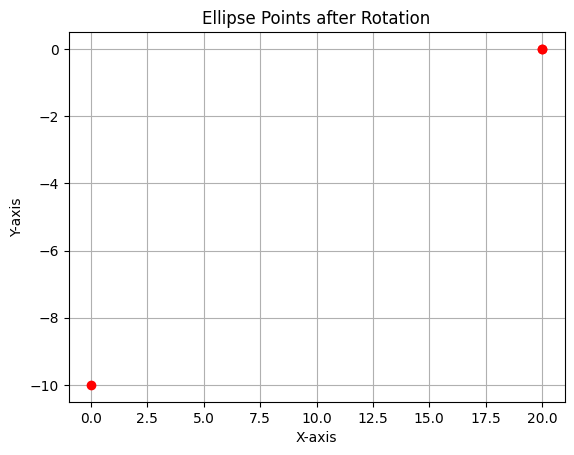

In [230]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define symbols
w, h = sp.symbols('w h')  # Width and height of the ellipse
theta = sp.symbols('theta')  # Rotation angle in 3D
angle = sp.symbols('angle')  # Gradient angle for ellipse points

# Define specific values for parameters
width_value = 20
height_value = 40
num_of_points = 4  # Number of points to plot

# Calculate theta
theta_expr = sp.acos(w / h)
theta_value = theta_expr.subs({w: width_value, h: height_value})
print("theta =", theta_value.evalf())

# Define rotation matrix
rotx = sp.Matrix([
    [1, 0, 0],
    [0, sp.cos(theta), sp.sin(theta)],
    [0, -sp.sin(theta), sp.cos(theta)]
])

# Define gradient
m = sp.tan(sp.pi / 2 - angle)

# Calculate ellipse points
# Adjust this formula based on the actual ellipse formula you're using
vecter = sp.Matrix([
    sp.sqrt(w**2 / (1 + m**2)),
    sp.sqrt(h**2 / (1 + (1 / m**2))),  # Changed to use height (h) for the second component
    m*sp.sqrt((w**2)/(1+m**2))*sp.tan(theta)])


# Apply rotation matrix
vecter = rotx * vecter
vecter = sp.simplify(vecter)

# Initialize array to store points
vecter_num = np.zeros((num_of_points, 3))

# Calculate and substitute specific values for each point
for i in range(num_of_points):
    angle_value = (2 * np.pi) / num_of_points * i # Generate angles evenly spaced
    vecter_subs = vecter.subs({w: width_value, h: height_value, theta: theta_value, angle: angle_value})
    
    # Convert SymPy Matrix to NumPy array
    vecter_num[i] = np.array(vecter_subs, dtype=float).flatten()  # Flatten the array to 1D if needed
    
    print(f"Ellipse Point {i + 1}:")
    print(vecter_num[i])

# Convert to NumPy array for 2D plotting
vecter_num_np = vecter_num[:, :2]  # Use only the first two dimensions for 2D plot

print("Ellipse Points:")
print(vecter_num_np)

# Visualization
fig, ax = plt.subplots()
ax.plot(vecter_num_np[:, 0], vecter_num_np[:, 1], 'ro')  # Plot points

# Add labels and grid
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Ellipse Points after Rotation')
ax.grid(True)

plt.show()